In [11]:
pip install ../../

Processing /home/mehdi/Straph
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for straph: filename=straph-0.3-py3-none-any.whl size=123551 sha256=6a69b3465149dee00482d8ca954881256c9f45c5ae4ea634428395c73f6956b4
  Stored in directory: /tmp/pip-ephem-wheel-cache-fcehpaj1/wheels/a5/b6/52/18c617da8ab7981501f28a49d398fa4ccca532d1baece44b1e
Successfully built straph
  Attempting uninstall: straph
    Found existing installation: straph 0.3
    Uninstalling straph-0.3:
      Successfully uninstalled straph-0.3
You should consider upgrading via the '/home/mehdi/sage/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may 

In [1]:
import straph as sg
import pandas as pd
import matplotlib.pyplot as plt
import straph.betweenness as bt
import numpy

In [2]:
plt.rcParams["figure.figsize"] = (12,9)

In [3]:
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "latapy_test_intro_nodes.sg",
                      path_links=path_directory + "latapy_test_intro_links.sg")
S.describe()

Nb of Nodes :  5
Nb of segmented nodes :  5.0
Nb of links :  12
Nb of segmented links :  32.0
Nb of event times :  26


In [4]:
bt.to_undirected(S)

<AxesSubplot:xlabel='t', ylabel='Nodes'>

findfont: Font family ['Garamond'] not found. Falling back to DejaVu Sans.


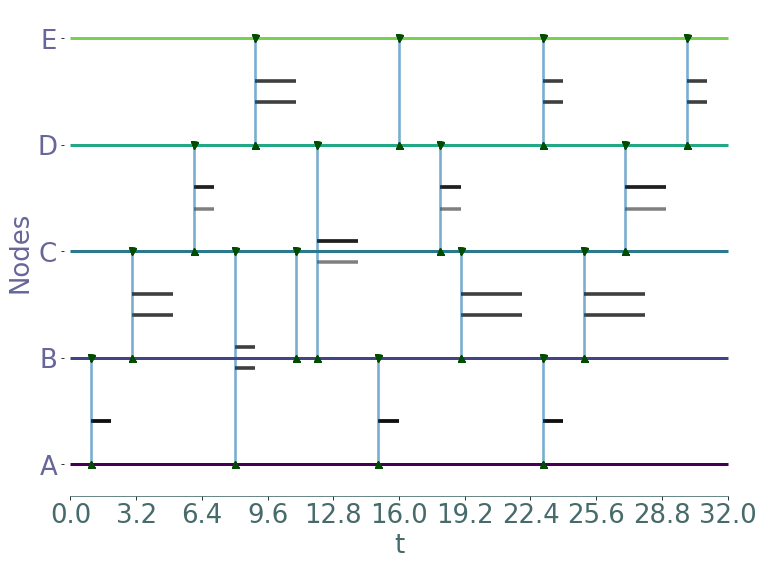

In [5]:
S.plot()

In [6]:
SS = S.stream_graph_to_link_stream()

In [7]:
#SS.write_to_matthieu_link_stream("erdos" + str(nb_erdos))

In [8]:
betweenness, general_contri, nouveau, events, sigma_r, latency, prev_next , contri, before, after, deltasvvt, no_succ ,features = bt.betweenness_all(SS)

0
********** (9.0, 11.0) **************
[(3, 6.0), (3, 7.0), (4, 11.0)]
///////////////////////
(4, 11.0) {} {(4, 11.0)}
(3, 7.0) {} {(3, 7.0)}
(4, 11.0) {} {(3, 7.0)}
(3, 6.0) {} {(3, 6.0)}
(4, 11.0) {} {(3, 6.0)}
********** (6.0, 7.0) **************
[(2, 3.0), (2, 5.0), (3, 7.0)]
///////////////////////
(3, 7.0) {} {(3, 7.0)}
(2, 5.0) {} {(2, 5.0)}
(3, 7.0) {} {(2, 5.0)}
(2, 3.0) {} {(2, 3.0)}
(3, 7.0) {} {(2, 3.0)}
********** (3.0, 5.0) **************
[(1, 2.0), (2, 5.0)]
///////////////////////
(2, 5.0) {} {(2, 5.0)}
(1, 2.0) {} {(1, 2.0)}
(2, 5.0) {} {(1, 2.0)}
********** (18.0, 19.0) **************
[(2, 19.0), (3, 19.0)]
///////////////////////
(3, 19.0) {} {(3, 19.0)}
(2, 19.0) {} {(2, 19.0)}
(3, 19.0) {} {(2, 19.0)}
********** (23.0, 24.0) **************
[(3, 19.0), (4, 24.0)]
///////////////////////
(4, 24.0) {} {(4, 24.0)}
(3, 19.0) {} {(3, 19.0)}
(4, 24.0) {} {(3, 19.0)}
********** (19.0, 22.0) **************
[(1, 16.0), (2, 22.0)]
///////////////////////
(2, 22.0) {} {(2, 2

In [9]:
import os
check_exec = 0
for v in SS.nodes:
    for (w,t) in deltasvvt[v].keys():
        if (w,t) in no_succ[v]:
            cmd = 'python2 archive_code/contri_point.py '+ str(t) + ' '+ str(SS.node_to_label[w]) + ' Test/ex-intro_mat.ls lol'
            res_exec = os.system(cmd)
            check_exec += res_exec
            print(cmd)
            print(res_exec)
            contri = bt.read_dictionary("archive_code/lol_contri_point.pic")
            #print(contri[SS.node_to_label[v]])
            if contri[SS.node_to_label[v]] != deltasvvt[v][(w,t)].val:
                print("probleme","v",v,"w",w,"t",t,"=>",contri[SS.node_to_label[v]],deltasvvt[v][(w,t)] )
print(res_exec)

archive_code
<lslib.LinkStream instance at 0x7f214f4435f0> A A (1.0, 'B') latency [(1.0, 1.0), (2.0, 2.0), (3.0, 3.0), (5.0, 5.0), (6.0, 6.0), (7.0, 7.0), (8.0, 8.0), (9.0, 9.0), (11.0, 11.0), (12.0, 12.0), (14.0, 14.0), (15.0, 15.0), (16.0, 16.0), (18.0, 18.0), (19.0, 19.0), (22.0, 22.0), (23.0, 23.0), (24.0, 24.0), (25.0, 25.0), (27.0, 27.0), (28.0, 28.0), (29.0, 29.0), (30.0, 30.0), (31.0, 31.0)]
('contri', 'A', 'A', ' = ', 0.0)
<lslib.LinkStream instance at 0x7f214f4435f0> A C (1.0, 'B') latency [(2.0, 3.0), (8.0, 8.0), (9.0, 9.0), (16.0, 19.0), (24.0, 25.0)]
('contri', 'A', 'C', ' = ', 0.0)
<lslib.LinkStream instance at 0x7f214f4435f0> A B (1.0, 'B') latency [(1.0, 1.0), (2.0, 2.0), (9.0, 11.0), (15.0, 15.0), (16.0, 16.0), (23.0, 23.0), (24.0, 24.0)]
prev [(0.0, (0.0, 0))]
next []
('left', (0.0, 0))
('contri', 'A', 'B', ' = ', 0.0)
<lslib.LinkStream instance at 0x7f214f4435f0> A E (1.0, 'B') latency [(2.0, 9.0), (9.0, 16.0), (16.0, 23.0), (24.0, 30.0)]
('contri', 'A', 'E', ' = ', 

archive_code
<lslib.LinkStream instance at 0x7fe1af93e5f0> A A (24.0, 'E') latency [(1.0, 1.0), (2.0, 2.0), (3.0, 3.0), (5.0, 5.0), (6.0, 6.0), (7.0, 7.0), (8.0, 8.0), (9.0, 9.0), (11.0, 11.0), (12.0, 12.0), (14.0, 14.0), (15.0, 15.0), (16.0, 16.0), (18.0, 18.0), (19.0, 19.0), (22.0, 22.0), (23.0, 23.0), (24.0, 24.0), (25.0, 25.0), (27.0, 27.0), (28.0, 28.0), (29.0, 29.0), (30.0, 30.0), (31.0, 31.0)]
('contri', 'A', 'A', ' = ', 0.0)
<lslib.LinkStream instance at 0x7fe1af93e5f0> A C (24.0, 'E') latency [(2.0, 3.0), (8.0, 8.0), (9.0, 9.0), (16.0, 19.0), (24.0, 25.0)]
('contri', 'A', 'C', ' = ', 0.0)
<lslib.LinkStream instance at 0x7fe1af93e5f0> A B (24.0, 'E') latency [(1.0, 1.0), (2.0, 2.0), (9.0, 11.0), (15.0, 15.0), (16.0, 16.0), (23.0, 23.0), (24.0, 24.0)]
('contri', 'A', 'B', ' = ', 0.0)
<lslib.LinkStream instance at 0x7fe1af93e5f0> A E (24.0, 'E') latency [(2.0, 9.0), (9.0, 16.0), (16.0, 23.0), (24.0, 30.0)]
('contri', 'A', 'E', ' = ', 0.0)
<lslib.LinkStream instance at 0x7fe1af93e

archive_code
<lslib.LinkStream instance at 0x7f404cc0f5f0> A A (3.0, 'C') latency [(1.0, 1.0), (2.0, 2.0), (3.0, 3.0), (5.0, 5.0), (6.0, 6.0), (7.0, 7.0), (8.0, 8.0), (9.0, 9.0), (11.0, 11.0), (12.0, 12.0), (14.0, 14.0), (15.0, 15.0), (16.0, 16.0), (18.0, 18.0), (19.0, 19.0), (22.0, 22.0), (23.0, 23.0), (24.0, 24.0), (25.0, 25.0), (27.0, 27.0), (28.0, 28.0), (29.0, 29.0), (30.0, 30.0), (31.0, 31.0)]
('contri', 'A', 'A', ' = ', 0.0)
<lslib.LinkStream instance at 0x7f404cc0f5f0> A C (3.0, 'C') latency [(2.0, 3.0), (8.0, 8.0), (9.0, 9.0), (16.0, 19.0), (24.0, 25.0)]
prev [(0.0, (0.0, 0))]
next [(8.0, (0.0, 0))]
('left', (0.0, 0))
('right', (0.0, 0))
('vol_tv', (1.0, 0), 'denum', (1.0, 0))
('contrib', 10.0)
('contri', 'A', 'C', ' = ', 10.0)
<lslib.LinkStream instance at 0x7f404cc0f5f0> A B (3.0, 'C') latency [(1.0, 1.0), (2.0, 2.0), (9.0, 11.0), (15.0, 15.0), (16.0, 16.0), (23.0, 23.0), (24.0, 24.0)]
('contri', 'A', 'B', ' = ', 0.0)
<lslib.LinkStream instance at 0x7f404cc0f5f0> A E (3.0, '

archive_code
<lslib.LinkStream instance at 0x7fa91a7d05f0> A A (24.0, 'E') latency [(1.0, 1.0), (2.0, 2.0), (3.0, 3.0), (5.0, 5.0), (6.0, 6.0), (7.0, 7.0), (8.0, 8.0), (9.0, 9.0), (11.0, 11.0), (12.0, 12.0), (14.0, 14.0), (15.0, 15.0), (16.0, 16.0), (18.0, 18.0), (19.0, 19.0), (22.0, 22.0), (23.0, 23.0), (24.0, 24.0), (25.0, 25.0), (27.0, 27.0), (28.0, 28.0), (29.0, 29.0), (30.0, 30.0), (31.0, 31.0)]
('contri', 'A', 'A', ' = ', 0.0)
<lslib.LinkStream instance at 0x7fa91a7d05f0> A C (24.0, 'E') latency [(2.0, 3.0), (8.0, 8.0), (9.0, 9.0), (16.0, 19.0), (24.0, 25.0)]
('contri', 'A', 'C', ' = ', 0.0)
<lslib.LinkStream instance at 0x7fa91a7d05f0> A B (24.0, 'E') latency [(1.0, 1.0), (2.0, 2.0), (9.0, 11.0), (15.0, 15.0), (16.0, 16.0), (23.0, 23.0), (24.0, 24.0)]
('contri', 'A', 'B', ' = ', 0.0)
<lslib.LinkStream instance at 0x7fa91a7d05f0> A E (24.0, 'E') latency [(2.0, 9.0), (9.0, 16.0), (16.0, 23.0), (24.0, 30.0)]
('contri', 'A', 'E', ' = ', 0.0)
<lslib.LinkStream instance at 0x7fa91a7d0

archive_code
<lslib.LinkStream instance at 0x7f34fa5305f0> A A (5.0, 'B') latency [(1.0, 1.0), (2.0, 2.0), (3.0, 3.0), (5.0, 5.0), (6.0, 6.0), (7.0, 7.0), (8.0, 8.0), (9.0, 9.0), (11.0, 11.0), (12.0, 12.0), (14.0, 14.0), (15.0, 15.0), (16.0, 16.0), (18.0, 18.0), (19.0, 19.0), (22.0, 22.0), (23.0, 23.0), (24.0, 24.0), (25.0, 25.0), (27.0, 27.0), (28.0, 28.0), (29.0, 29.0), (30.0, 30.0), (31.0, 31.0)]
('contri', 'A', 'A', ' = ', 0.0)
<lslib.LinkStream instance at 0x7f34fa5305f0> A C (5.0, 'B') latency [(2.0, 3.0), (8.0, 8.0), (9.0, 9.0), (16.0, 19.0), (24.0, 25.0)]
('contri', 'A', 'C', ' = ', 0.0)
<lslib.LinkStream instance at 0x7f34fa5305f0> A B (5.0, 'B') latency [(1.0, 1.0), (2.0, 2.0), (9.0, 11.0), (15.0, 15.0), (16.0, 16.0), (23.0, 23.0), (24.0, 24.0)]
('contri', 'A', 'B', ' = ', 0.0)
<lslib.LinkStream instance at 0x7f34fa5305f0> A E (5.0, 'B') latency [(2.0, 9.0), (9.0, 16.0), (16.0, 23.0), (24.0, 30.0)]
prev [(0.0, (0.0, 0))]
next [(16.0, (0.0, 0)), (23.0, (2.0, 1)), (30.0, (2.0, 

archive_code
<lslib.LinkStream instance at 0x7f313930a5f0> A A (16.0, 'E') latency [(1.0, 1.0), (2.0, 2.0), (3.0, 3.0), (5.0, 5.0), (6.0, 6.0), (7.0, 7.0), (8.0, 8.0), (9.0, 9.0), (11.0, 11.0), (12.0, 12.0), (14.0, 14.0), (15.0, 15.0), (16.0, 16.0), (18.0, 18.0), (19.0, 19.0), (22.0, 22.0), (23.0, 23.0), (24.0, 24.0), (25.0, 25.0), (27.0, 27.0), (28.0, 28.0), (29.0, 29.0), (30.0, 30.0), (31.0, 31.0)]
('contri', 'A', 'A', ' = ', 0.0)
<lslib.LinkStream instance at 0x7f313930a5f0> A C (16.0, 'E') latency [(2.0, 3.0), (8.0, 8.0), (9.0, 9.0), (16.0, 19.0), (24.0, 25.0)]
('contri', 'A', 'C', ' = ', 0.0)
<lslib.LinkStream instance at 0x7f313930a5f0> A B (16.0, 'E') latency [(1.0, 1.0), (2.0, 2.0), (9.0, 11.0), (15.0, 15.0), (16.0, 16.0), (23.0, 23.0), (24.0, 24.0)]
('contri', 'A', 'B', ' = ', 0.0)
<lslib.LinkStream instance at 0x7f313930a5f0> A E (16.0, 'E') latency [(2.0, 9.0), (9.0, 16.0), (16.0, 23.0), (24.0, 30.0)]
prev [(2.0, (0.0, 0)), (0.0, (2.0, 2))]
next [(23.0, (0.0, 0)), (30.0, (1.

archive_code
<lslib.LinkStream instance at 0x7f0cd1d175f0> A A (24.0, 'A') latency [(1.0, 1.0), (2.0, 2.0), (3.0, 3.0), (5.0, 5.0), (6.0, 6.0), (7.0, 7.0), (8.0, 8.0), (9.0, 9.0), (11.0, 11.0), (12.0, 12.0), (14.0, 14.0), (15.0, 15.0), (16.0, 16.0), (18.0, 18.0), (19.0, 19.0), (22.0, 22.0), (23.0, 23.0), (24.0, 24.0), (25.0, 25.0), (27.0, 27.0), (28.0, 28.0), (29.0, 29.0), (30.0, 30.0), (31.0, 31.0)]
prev []
next []
('contri', 'A', 'A', ' = ', 0.0)
<lslib.LinkStream instance at 0x7f0cd1d175f0> A C (24.0, 'A') latency [(2.0, 3.0), (8.0, 8.0), (9.0, 9.0), (16.0, 19.0), (24.0, 25.0)]
prev [(9.0, (0.0, 0))]
next [(32.0, (0.0, 0))]
('left', (0.0, 0))
('right', (0.0, 0))
('vol_tv', (1.0, 0), 'denum', (1.0, 0))
('contrib', 105.0)
('contri', 'A', 'C', ' = ', 105.0)
<lslib.LinkStream instance at 0x7f0cd1d175f0> A B (24.0, 'A') latency [(1.0, 1.0), (2.0, 2.0), (9.0, 11.0), (15.0, 15.0), (16.0, 16.0), (23.0, 23.0), (24.0, 24.0)]
prev []
next [(32.0, (0.0, 0))]
('contri', 'A', 'B', ' = ', 0.0)
<ls

archive_code
<lslib.LinkStream instance at 0x7f68e0ce75f0> A A (11.0, 'E') latency [(1.0, 1.0), (2.0, 2.0), (3.0, 3.0), (5.0, 5.0), (6.0, 6.0), (7.0, 7.0), (8.0, 8.0), (9.0, 9.0), (11.0, 11.0), (12.0, 12.0), (14.0, 14.0), (15.0, 15.0), (16.0, 16.0), (18.0, 18.0), (19.0, 19.0), (22.0, 22.0), (23.0, 23.0), (24.0, 24.0), (25.0, 25.0), (27.0, 27.0), (28.0, 28.0), (29.0, 29.0), (30.0, 30.0), (31.0, 31.0)]
('contri', 'A', 'A', ' = ', 0.0)
<lslib.LinkStream instance at 0x7f68e0ce75f0> A C (11.0, 'E') latency [(2.0, 3.0), (8.0, 8.0), (9.0, 9.0), (16.0, 19.0), (24.0, 25.0)]
('contri', 'A', 'C', ' = ', 0.0)
<lslib.LinkStream instance at 0x7f68e0ce75f0> A B (11.0, 'E') latency [(1.0, 1.0), (2.0, 2.0), (9.0, 11.0), (15.0, 15.0), (16.0, 16.0), (23.0, 23.0), (24.0, 24.0)]
('contri', 'A', 'B', ' = ', 0.0)
<lslib.LinkStream instance at 0x7f68e0ce75f0> A E (11.0, 'E') latency [(2.0, 9.0), (9.0, 16.0), (16.0, 23.0), (24.0, 30.0)]
('contri', 'A', 'E', ' = ', 0.0)
<lslib.LinkStream instance at 0x7f68e0ce7

archive_code
<lslib.LinkStream instance at 0x7f1d97b565f0> A A (27.0, 'B') latency [(1.0, 1.0), (2.0, 2.0), (3.0, 3.0), (5.0, 5.0), (6.0, 6.0), (7.0, 7.0), (8.0, 8.0), (9.0, 9.0), (11.0, 11.0), (12.0, 12.0), (14.0, 14.0), (15.0, 15.0), (16.0, 16.0), (18.0, 18.0), (19.0, 19.0), (22.0, 22.0), (23.0, 23.0), (24.0, 24.0), (25.0, 25.0), (27.0, 27.0), (28.0, 28.0), (29.0, 29.0), (30.0, 30.0), (31.0, 31.0)]
('contri', 'A', 'A', ' = ', 0.0)
<lslib.LinkStream instance at 0x7f1d97b565f0> A C (27.0, 'B') latency [(2.0, 3.0), (8.0, 8.0), (9.0, 9.0), (16.0, 19.0), (24.0, 25.0)]
('contri', 'A', 'C', ' = ', 0.0)
<lslib.LinkStream instance at 0x7f1d97b565f0> A B (27.0, 'B') latency [(1.0, 1.0), (2.0, 2.0), (9.0, 11.0), (15.0, 15.0), (16.0, 16.0), (23.0, 23.0), (24.0, 24.0)]
('contri', 'A', 'B', ' = ', 0.0)
<lslib.LinkStream instance at 0x7f1d97b565f0> A E (27.0, 'B') latency [(2.0, 9.0), (9.0, 16.0), (16.0, 23.0), (24.0, 30.0)]
prev [(0.0, (0.0, 0))]
next [(32.0, (0.0, 0))]
('left', (0.0, 0))
('right'

In [ ]:
#MARCHE PAS